**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [46]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics

from scipy import stats
#%load_ext pycodestyle_magic

In [47]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    "Метрика - евклидово расстояние, реализовано с помощью sklearn.metrics.pairwise.euclidean_distances"
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        
    def _getKNeighborsClasses(self, X, n_neighbors=None):
        """Функция, возвращающая классы k ближайших соседей"""
        if n_neighbors is None:
            n_neighbors = self.n_neighbors
    
        two_euc_dist = sklearn.metrics.pairwise.euclidean_distances(X, self.x_array)
        neigborsIndexes = np.argsort(two_euc_dist, axis=1)[:, : n_neighbors]
        return self.y_array[neigborsIndexes]
        
    def fit(self, X, y):
        '''Функция проверки правильности формата исходных данных: X - train data, 1 <= X.ndim <= 2 
        (форматирование при X.ndim = 1); y - target values, y.ndim=1.'''
        
        if not (isinstance(X, np.ndarray) and isinstance(y, np.ndarray)) or y.ndim!=1 or X.ndim!=2:
            raise Exeption("Wrong data format!")
        
        if X.ndim == 1:
            self.x_array = X.reshape(X.shape[0], 1)
        else:
            self.x_array = X
        
        self.y_array = y
        self.classes_ = np.unique(y)
    
    def predict(self, X):
        '''Функция, предсказывающая класс объекта'''
        
        '''Параметры: X - numpy-array, shape (n_query, n_features)
           Функция вовращает numpy-array of shape (n_samples)
        '''
        
        if not isinstance(X, np.ndarray) or X.ndim != 2 or X.shape[1] != self.x_array.shape[1]:
            raise Exception('Wrong format of X')

        classesNeighbors = self._getKNeighborsClasses(X)
        return np.array(stats.mode(classesNeighbors, axis=1))[0].ravel()
    
    def predict_proba(self, X):
        classesNeighbors = self._getKNeighborsClasses(X)

        probs = []
        for c_class in self.classes_:
            probs.append(np.sum(c_class == classesNeighbors, axis=1))

        return np.array(probs).T / self.n_neighbors

    
    def score(self, X, y):
        return np.average(self.predict(X) == y)

**IRIS**

In [48]:
iris = datasets.load_iris()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [50]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [51]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 1.81 ms, total: 1.81 ms
Wall time: 1.69 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [52]:
%time my_clf.fit(X_train, y_train)

CPU times: user 212 µs, sys: 112 µs, total: 324 µs
Wall time: 246 µs


In [53]:
%time clf.predict(X_test)

CPU times: user 1.09 ms, sys: 69 µs, total: 1.16 ms
Wall time: 882 µs


array([1, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1])

In [54]:
%time my_clf.predict(X_test)

CPU times: user 1.01 ms, sys: 532 µs, total: 1.54 ms
Wall time: 1.25 ms


array([1, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1])

In [55]:
%time clf.predict_proba(X_test)

CPU times: user 849 µs, sys: 0 ns, total: 849 µs
Wall time: 710 µs


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [56]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.47 ms, sys: 0 ns, total: 1.47 ms
Wall time: 1.5 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [57]:
clf.score(X_test, y_test)

0.9333333333333333

In [58]:
my_clf.score(X_test, y_test)

0.9333333333333333

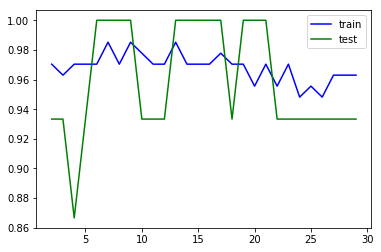

In [59]:
# Задание 3

score_train = []
score_test = []
n_neighbours = range(2, 30)
for k in n_neighbours:
    predictor = MyKNeighborsClassifier(k)
    predictor.fit(X_train, y_train)
    
    score_train.append(predictor.score(X_train, y_train))
    score_test.append(predictor.score(X_test, y_test))
    
plt.plot(n_neighbours, score_train, color='blue', label='train')
plt.plot(n_neighbours, score_test, color='green', label='test')

plt.legend()
plt.show()

In [17]:
# Как можно увидеть, максимальное значение score наблюдается при количестве соседей от 6 до 9, 
#от 13 до 17 и от 19 до 21.

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

Wall time: 1min 24s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

Wall time: 4 ms


In [20]:
%time clf.predict(X_test)

Wall time: 24min 21s


array([3., 4., 8., ..., 1., 2., 5.])

In [21]:
%time my_clf.predict(X_test)

Wall time: 2min 27s


array([3., 4., 8., ..., 1., 2., 5.])

In [22]:
%time clf.predict_proba(X_test)

Wall time: 24min 13s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

Wall time: 2min 27s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.9675714285714285

In [25]:
my_clf.score(X_test, y_test)

0.9675714285714285

Задание 5

In [ ]:
# seaborn
'''
Seaborn - это библиотека Python для построения графиков и визуалиции данных,в качестве основы использован
matplotlib. Предоставляет возможности высокоуровнего интерфейса для создания наглядных статистических графиков.
'''
# matplotlib
'''
Matplotlib - это библитека Python, интерактивная кроссплатформенная среда для создания 2D изображений, графиков, 
фигур и интерактивных окружений. 
'''
# train_test_split
'''
Разбивает массив данных(типа lists, numpy arrays, scipy-sparse matrices или pandas dataframes) на два 
подмножества: тренировочное и тестовое. 
Размеры подмножеств варьируются с помощью аргументов параметров команды.
'''
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
'''
Pipeline используется для соедининения несколько алгоритмов в один каскад, 
необходим при наличии определенной последовательности в обработке
данных. 
'''
# StandardScaler (from sklearn.preprocessing import StandardScaler)
'''
StandardScaler нужен для стандартизации данных. Алгоритм: вычитаем среднее
и нормируем до единичной дисперсии.
'''
# ClassifierMixin
'''
Класс "Mixin", нужен для подсчета числовой характеристики работоспособности метода классификации. 
'''
# NeighborsBase
'''
Класс "NeighborsBase" -основа для всех вариантов метода ближайших соседей. 
'''
# KNeighborsMixin
'''
Класс "Mixin" для поиска k ближайших соседей. 
Имеет два метода: 
kneighbors(self, X=None, n_neighbors=None, return_distance=True) 
        Находит k соседей данной точки
kneighbors_graph(self, X=None, n_neighbors=None,
                         mode='connectivity')
        Вычисляет взвешенный граф k cоседей для точек из X
'''

# SupervisedIntegerMixin
'''
Класс "Mixin" с одним методом fit(self, X, y), который обучает
модель, используя X как train data, а y как target values.
'''
